### Results for Generalist Models

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

name_map = {
    "Gendarme_BriFi": "BriFiSeg",
    "cellpose": "Cellpose",
    "ep_phase_microscopy_all": "Phase400",
    "H_and_E": "H&E",
    "tissuenet_wholecell": "TissueNet",
    "YeaZ": "YeaZ",
    "YeastNet": "YeastNet",
    "dsb_fixed": "DSB",
    "deepbacs": "DeepBacs",
    "omnipose": "OmniPose",
}


datasets = [
    'Gendarme_BriFi',
    'H_and_E',
    'YeaZ',
    'YeastNet',
    'cellpose',
    'deepbacs',
    'dsb_fixed',
    'ep_phase_microscopy_all',
    'omnipose',
    'tissuenet_wholecell',
]

# colors for the plots
c1 = "#fdbb84"
c2 = "#e34a33"
c3 = '#deebf7'
c4 = '#3182bd'

In [2]:
## define paths and load results

cellsam_path = Path('/home/ulisrael/cellSAM/paper_figures/eval_results/cellsam')
cellpose_path = Path('/home/ulisrael/cellSAM/paper_figures/eval_results/cellpose')

cellpose_generalist_path = cellpose_path / 'general'
cellsam_generalist_path = cellsam_path / 'general'


cp_generalist_dict = {}

for file in cellpose_generalist_path.glob("*.txt"):
    try:
        data = np.loadtxt(file)
        cp_generalist_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

cs_generalist_dict = {}

for file in cellsam_generalist_path.glob("*.txt"):
    try:
        data = np.loadtxt(file)
        cs_generalist_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")


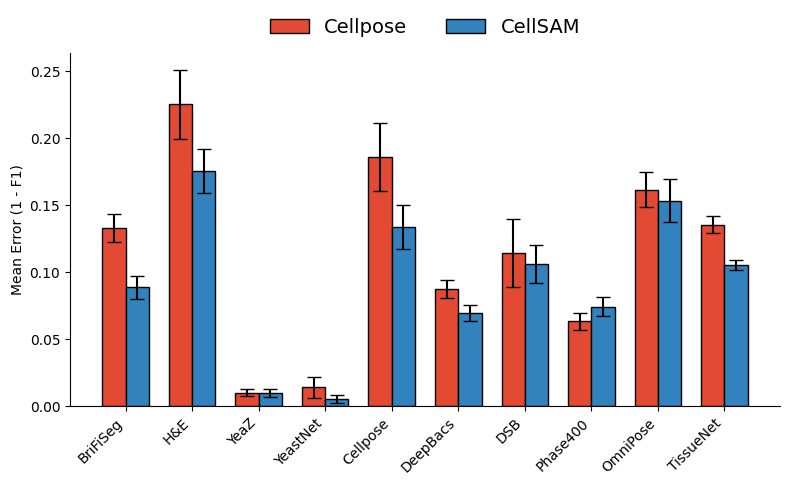

In [4]:
"""
Cellpose vs CellSAM - Generalist Models by Dataset
"""

cp_means = []; cs_means = []
cp_sems = []; cs_sems = []

for ds in datasets:
    cp_data = cp_generalist_dict[ds]
    cs_data = cs_generalist_dict[ds]
    # 1 - mean for the bar
    cp_m = 1 - np.mean(cp_data)
    cs_m = 1 - np.mean(cs_data)
    # standard error of the mean for the error bar
    cp_sem = np.std(cp_data, ddof=1) / np.sqrt(len(cp_data))
    cs_sem = np.std(cs_data, ddof=1) / np.sqrt(len(cs_data))

    cp_means.append(cp_m)
    cs_means.append(cs_m)
    cp_sems.append(cp_sem)
    cs_sems.append(cs_sem)

# Plot as a bar chart
x = np.arange(len(datasets))
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(8, 5))

# Plot CP bars slightly left, CS bars slightly right
bars_cp = ax.bar(x - width/2, cp_means, width, 
                 edgecolor='black', linewidth=1,
                 yerr=cp_sems, capsize=5, label='Cellpose', color=c2)
bars_cs = ax.bar(x + width/2, cs_means, width, 
                 edgecolor='black', linewidth=1,
                 yerr=cs_sems, capsize=5, label='CellSAM', color=c4)

ax.set_xticks(x)
ax.set_xticklabels([name_map[ds] for ds in datasets], rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_dataset_comparison_cp_reg.svg", format="svg", dpi=300)
plt.show()

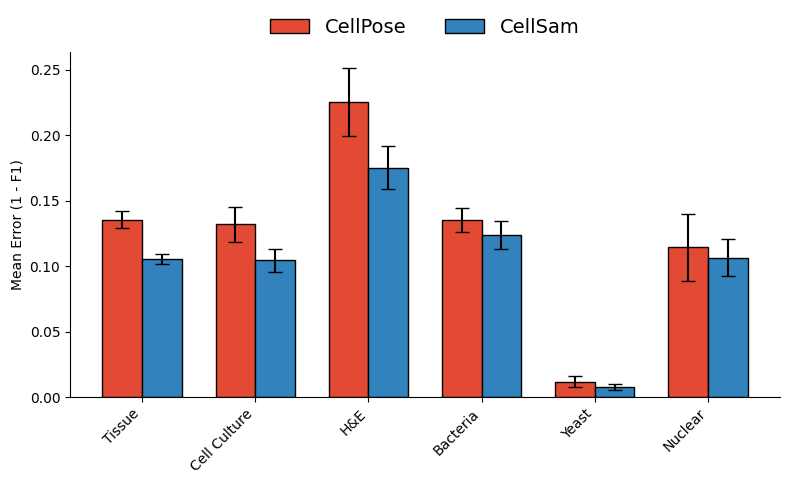

In [6]:
"""
Cellpose vs CellSAM - Generalist Models by Data Type
"""

dataset_agg_map = {
    "Tissue": ["tissuenet_wholecell"],
    "Cell Culture": ["cellpose", "ep_phase_microscopy_all", "Gendarme_BriFi"],
    "H&E": ["H_and_E"],
    "Bacteria": ["deepbacs", "omnipose"],
    "Yeast": ["YeaZ", "YeastNet"],
    "Nuclear": ["dsb_fixed"],
}

group_names = list(dataset_agg_map.keys())
cp_group_means = []
cp_group_sems  = []
cs_group_means = []
cs_group_sems  = []

for group in group_names:
    # Get all datasets that belong to this group
    datasets_for_group = dataset_agg_map[group]
    
    # Gather all F1 arrays and concatenate them
    cp_all = np.concatenate([cp_generalist_dict[ds] for ds in datasets_for_group])
    cs_all = np.concatenate([cs_generalist_dict[ds] for ds in datasets_for_group])
    
    # Compute (1 - mean(F1)) for the group
    cp_mean = 1 - np.mean(cp_all)
    cs_mean = 1 - np.mean(cs_all)
    cp_group_means.append(cp_mean)
    cs_group_means.append(cs_mean)
    
    # Standard error of the mean (SEM) for the group
    cp_sem = np.std(cp_all, ddof=1) / np.sqrt(len(cp_all))
    cs_sem = np.std(cs_all, ddof=1) / np.sqrt(len(cs_all))
    cp_group_sems.append(cp_sem)
    cs_group_sems.append(cs_sem)

# Now plot side‐by‐side bars for the groups
x = np.arange(len(group_names))
width = 0.35
plt.rcParams['svg.fonttype'] = 'none' 
fig, ax = plt.subplots(figsize=(8,5))

bars_cp = ax.bar(
    x - width/2, cp_group_means, width,
    yerr=cp_group_sems, edgecolor='black', linewidth=1, capsize=5, 
    label='Cellpose', color=c2
)
bars_cs = ax.bar(
    x + width/2, cs_group_means, width,
    yerr=cs_group_sems, edgecolor='black', linewidth=1, capsize=5, 
    label='CellSAM', color=c4
)

ax.set_xticks(x)
ax.set_xticklabels(group_names, rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_general_grouped_comparison_cp_reg.svg", format="svg", dpi=300)
plt.show()

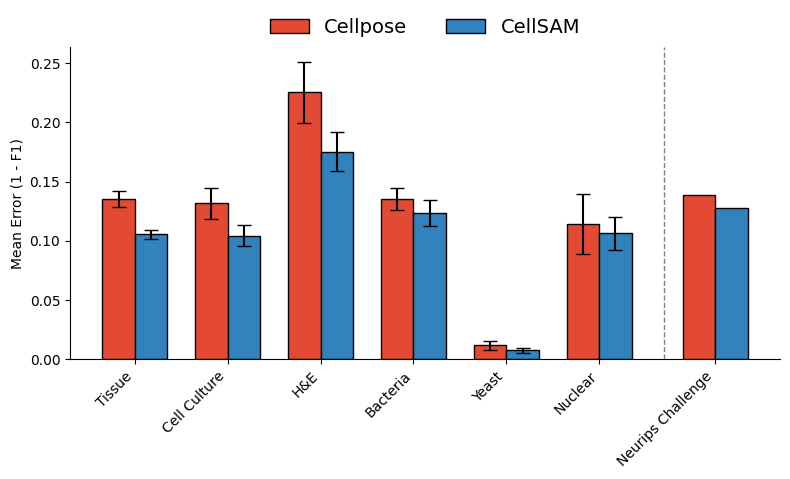

In [8]:
"""
Cellpose vs CellSAM - Generalist Models by Data Type + Neurips Challenge
"""

import numpy as np
import matplotlib.pyplot as plt


dataset_agg_map = {
    "Tissue": ["tissuenet_wholecell"],
    "Cell Culture": ["cellpose", "ep_phase_microscopy_all", "Gendarme_BriFi"],
    "H&E": ["H_and_E"],
    "Bacteria": ["deepbacs", "omnipose"],
    "Yeast": ["YeaZ", "YeastNet"],
    "Nuclear": ["dsb_fixed"],
}

group_names = list(dataset_agg_map.keys())
cp_group_means = []
cp_group_sems  = []
cs_group_means = []
cs_group_sems  = []

for group in group_names:
    # Get all datasets that belong to this group
    datasets_for_group = dataset_agg_map[group]
    
    # Gather all F1 arrays and concatenate them
    cp_all = np.concatenate([cp_generalist_dict[ds] for ds in datasets_for_group])
    cs_all = np.concatenate([cs_generalist_dict[ds] for ds in datasets_for_group])
    
    # Compute (1 - mean(F1)) for the group
    cp_mean = 1 - np.mean(cp_all)
    cs_mean = 1 - np.mean(cs_all)
    cp_group_means.append(cp_mean)
    cs_group_means.append(cs_mean)
    
    # Standard error of the mean (SEM) for the group
    cp_sem = np.std(cp_all, ddof=1) / np.sqrt(len(cp_all))
    cs_sem = np.std(cs_all, ddof=1) / np.sqrt(len(cs_all))
    cp_group_sems.append(cp_sem)
    cs_group_sems.append(cs_sem)

# Existing group names
group_names = list(dataset_agg_map.keys())
group_names.append("Neurips Challenge")

# neurips challenge results
cp_new_val = 1 - 0.8612  
cs_new_val = 1 - 0.8723 

cp_group_means.append(cp_new_val)
cs_group_means.append(cs_new_val)
# Since there's no variability reported, just pass 0 or None
cp_group_sems.append(0)
cs_group_sems.append(0)

# Plotting
x = np.arange(len(group_names))  # Now has len() = old groups + 1
width = 0.35
fig, ax = plt.subplots(figsize=(8,5))

bars_cp = ax.bar(
    x[:-1] - width/2, cp_group_means[:-1], width,
    yerr=cp_group_sems[:-1], edgecolor='black', linewidth=1, capsize=5, 
    label='Cellpose', color=c2
)
bars_cs = ax.bar(
    x[:-1] + width/2, cs_group_means[:-1], width,
    yerr=cs_group_sems[:-1], edgecolor='black', linewidth=1, capsize=5, 
    label='CellSAM', color=c4
)


# Now create the last bar group closer to the existing ones
offset = 0.25            
separator_x = x[-1] - .3 
last_index = x[-1] + offset

bars_cp_new = ax.bar(
    last_index - width/2, cp_group_means[-1], width,
    yerr=cp_group_sems[-1], edgecolor='black', linewidth=1, 
    color=c2
)
bars_cs_new = ax.bar(
    last_index + width/2, cs_group_means[-1], width,
    yerr=cs_group_sems[-1], edgecolor='black', linewidth=1, 
    color=c4
)

# Then move the dotted line accordingly
ax.axvline(separator_x, color='gray', linestyle='--', linewidth=1)
xtick_positions = np.concatenate((x[:-1], [last_index]))
ax.set_xticks(xtick_positions)
ax.set_xticklabels(group_names, rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_general_grouped_comparison_cp_reg.svg", format="svg", dpi=300)
plt.show()

### Results for Individual Models

In [33]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

name_map = {
    "Gendarme_BriFi": "BriFiSeg",
    "cellpose": "Cellpose",
    "ep_phase_microscopy_all": "Phase400",
    "H_and_E": "H&E",
    "tissuenet_wholecell": "TissueNet",
    "YeaZ": "YeaZ",
    "YeastNet": "YeastNet",
    "dsb_fixed": "DSB",
    "deepbacs": "DeepBacs",
    "omnipose": "OmniPose",
}


datasets = [
    'Gendarme_BriFi',
    'H_and_E',
    'YeaZ',
    'YeastNet',
    'cellpose',
    'deepbacs',
    'dsb_fixed',
    'ep_phase_microscopy_all',
    'omnipose',
    'tissuenet_wholecell',
]


# colors for the plots
c1 = "#fdbb84"
c2 = "#e34a33"
c3 = '#deebf7'
c4 = '#3182bd'

In [9]:
cellsam_path = Path('/home/ulisrael/cellSAM/paper_figures/eval_results/cellsam')
cellpose_path = Path('/home/ulisrael/cellSAM/paper_figures/eval_results/cellpose')

cellpose_individual_path = cellpose_path / 'individual'

# load results from txt files
cp_individual_dict = {}
for file in cellpose_individual_path.glob("*.txt"):  # Selects only .txt files
    try:
        data = np.loadtxt(file)  # Load as NumPy array
        cp_individual_dict[file.stem] = data  # Store in dictionary with filename (without extension)
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

cellsam_individual_path = cellsam_path / 'individual'

cs_individual_dict = {}
for file in cellsam_individual_path.glob("*.txt"):  # Selects only .txt files
    try:
        data = np.loadtxt(file)  # Load as NumPy array
        cs_individual_dict[file.stem] = data  # Store in dictionary with filename (without extension)
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

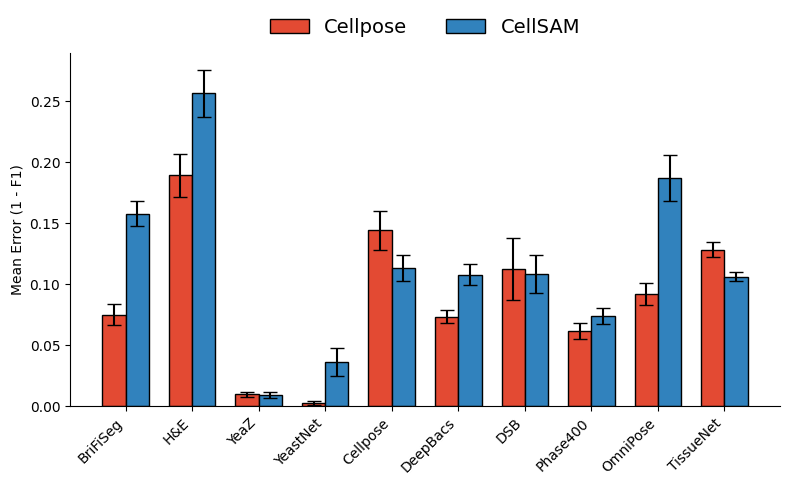

In [10]:
"""
Cellpose vs CellSAM - Individual Models by Dataset
"""

cp_means = []; cs_means = []
cp_sems = []; cs_sems = []

for ds in datasets:
    cp_data = cp_individual_dict[ds]
    cs_data = cs_individual_dict[ds]
    # 1 - mean for the bar
    cp_m = 1 - np.mean(cp_data)
    cs_m = 1 - np.mean(cs_data)
    # standard error of the mean for the error bar
    cp_sem = np.std(cp_data, ddof=1) / np.sqrt(len(cp_data))
    cs_sem = np.std(cs_data, ddof=1) / np.sqrt(len(cs_data))

    cp_means.append(cp_m)
    cs_means.append(cs_m)
    cp_sems.append(cp_sem)
    cs_sems.append(cs_sem)

# Plot as a bar chart
x = np.arange(len(datasets))
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(8, 5))

# Plot CP bars slightly left, CS bars slightly right
bars_cp = ax.bar(x - width/2, cp_means, width,
                 edgecolor='black', linewidth=1,
                 yerr=cp_sems, capsize=5, label='Cellpose', color=c2)
bars_cs = ax.bar(x + width/2, cs_means, width, 
                 edgecolor='black', linewidth=1,
                 yerr=cs_sems, capsize=5, label='CellSAM', color=c4)

ax.set_xticks(x)
ax.set_xticklabels([name_map[ds] for ds in datasets], rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_general_grouped_comparison_cp_reg.svg", format="svg", dpi=300)
plt.show()

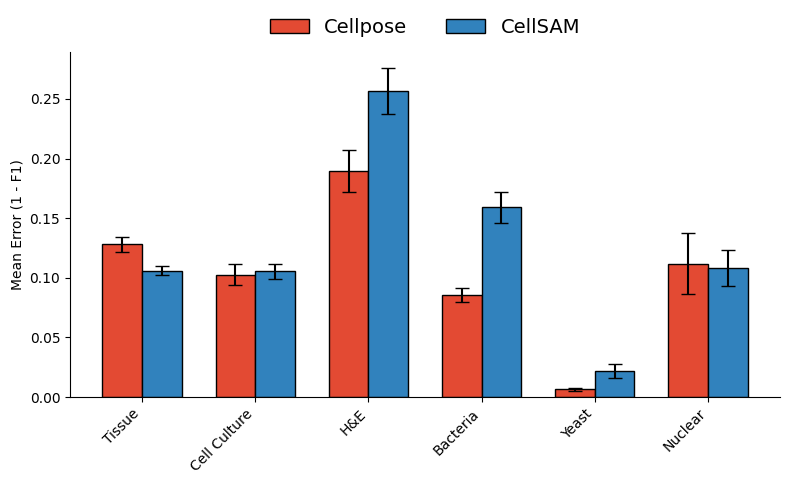

In [12]:
"""
Cellpose vs CellSAM - Individual Models by Data Type
"""
# Your mapping from group -> list of dataset keys:
dataset_agg_map = {
    "Tissue": ["tissuenet_wholecell"],
    "Cell Culture": ["cellpose", "ep_phase_microscopy_all", "Gendarme_BriFi"],
    "H&E": ["H_and_E"],
    "Bacteria": ["deepbacs", "omnipose"],
    "Yeast": ["YeaZ", "YeastNet"],
    "Nuclear": ["dsb_fixed"],
}


group_names = list(dataset_agg_map.keys())

cp_group_means = []
cp_group_sems  = []
cs_group_means = []
cs_group_sems  = []

for group in group_names:
    # Get all datasets that belong to this group
    datasets_for_group = dataset_agg_map[group]
    
    # Gather all F1 arrays and concatenate them
    cp_all = np.concatenate([cp_individual_dict[ds] for ds in datasets_for_group])
    cs_all = np.concatenate([cs_individual_dict[ds] for ds in datasets_for_group])
    
    # Compute (1 - mean(F1)) for the group
    cp_mean = 1 - np.mean(cp_all)
    cs_mean = 1 - np.mean(cs_all)
    cp_group_means.append(cp_mean)
    cs_group_means.append(cs_mean)
    
    # Standard error of the mean (SEM) for the group
    cp_sem = np.std(cp_all, ddof=1) / np.sqrt(len(cp_all))
    cs_sem = np.std(cs_all, ddof=1) / np.sqrt(len(cs_all))
    cp_group_sems.append(cp_sem)
    cs_group_sems.append(cs_sem)

# Now plot side‐by‐side bars for the groups
x = np.arange(len(group_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))

bars_cp = ax.bar(
    x - width/2, cp_group_means, width,
    edgecolor='black', linewidth=1,
    yerr=cp_group_sems, capsize=5, 
    label='Cellpose', color=c2
)
bars_cs = ax.bar(
    x + width/2, cs_group_means, width,
    edgecolor='black', linewidth=1,
    yerr=cs_group_sems, capsize=5, 
    label='CellSAM', color=c4
)

ax.set_xticks(x)
ax.set_xticklabels(group_names, rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
# ax.set_title('Grouped Comparison of Mean Error')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_general_grouped_comparison_cp_reg.svg", format="svg", dpi=300)
plt.show()

### CellSAM Generalist vs Specialist

In [13]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


name_map = {
    "Gendarme_BriFi": "BriFiSeg",
    "cellpose": "Cellpose",
    "ep_phase_microscopy_all": "Phase400",
    "H_and_E": "H&E",
    "tissuenet_wholecell": "TissueNet",
    "YeaZ": "YeaZ",
    "YeastNet": "YeastNet",
    "dsb_fixed": "DSB",
    "deepbacs": "DeepBacs",
    "omnipose": "OmniPose",
}


datasets = [
    'Gendarme_BriFi',
    'H_and_E',
    'YeaZ',
    'YeastNet',
    'cellpose',
    'deepbacs',
    'dsb_fixed',
    'ep_phase_microscopy_all',
    'omnipose',
    'tissuenet_wholecell',
]
 
c1 = "#fdbb84"
c2 = "#e34a33"
c3 = '#deebf7'
c4 = '#3182bd'

cellsam_path = Path('/home/ulisrael/cellSAM/paper_figures/eval_results/cellsam')
cellsam_generalist_path = cellsam_path / 'general'
cellsam_individual_path = cellsam_path / 'individual'


cellsam_generalist_dict = {}
for file in cellsam_generalist_path.glob("*.txt"):
    try:
        data = np.loadtxt(file)
        cellsam_generalist_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")


cellsam_specific_dict = {}
for file in cellsam_individual_path.glob("*.txt"):
    try:
        data = np.loadtxt(file)
        cellsam_specific_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

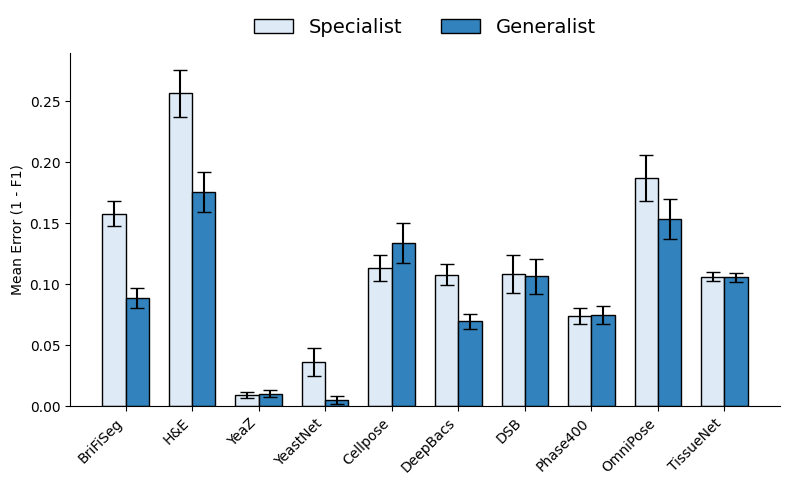

In [19]:
"""
CellSAM Specialist vs Generalist by Dataset
"""

cs_general_means = []; cs_specific_means = []
cs_general_sems = []; cs_specific_sems = []

for ds in datasets:
    cs_general_data = cellsam_generalist_dict[ds]
    cs_specific_data = cellsam_specific_dict[ds]
    
    # Compute (1 - mean(F1)) for the group
    cs_general_mean = 1 - np.mean(cs_general_data)
    cs_specific_mean = 1 - np.mean(cs_specific_data)
    cs_general_means.append(cs_general_mean)
    cs_specific_means.append(cs_specific_mean)
    
    # Standard error of the mean (SEM) for the group
    cs_general_sem = np.std(cs_general_data, ddof=1) / np.sqrt(len(cs_general_data))
    cs_specific_sem = np.std(cs_specific_data, ddof=1) / np.sqrt(len(cs_specific_data))
    cs_general_sems.append(cs_general_sem)
    cs_specific_sems.append(cs_specific_sem)


x = np.arange(len(datasets))
width = 0.35
plt.rcParams['svg.fonttype'] = 'none' 

fig, ax = plt.subplots(figsize=(8, 5))

bars_cs_specific = ax.bar(
    x - width/2, cs_specific_means, width,
    edgecolor='black', linewidth=1,
    yerr=cs_specific_sems, capsize=5, 
    label='Specialist', color=c3
)

bars_cs_general = ax.bar(
    x + width/2, cs_general_means, width,
    edgecolor='black', linewidth=1,
    yerr=cs_general_sems, capsize=5, 
    label='Generalist', color=c4
)


ax.set_xticks(x)
ax.set_xticklabels([name_map[ds] for ds in datasets], rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
# ax.set_title('Generalist Model Comparison of Mean Error')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_dataset_comparison_cellsam_specific_general.svg", format="svg", dpi=300)
plt.show()

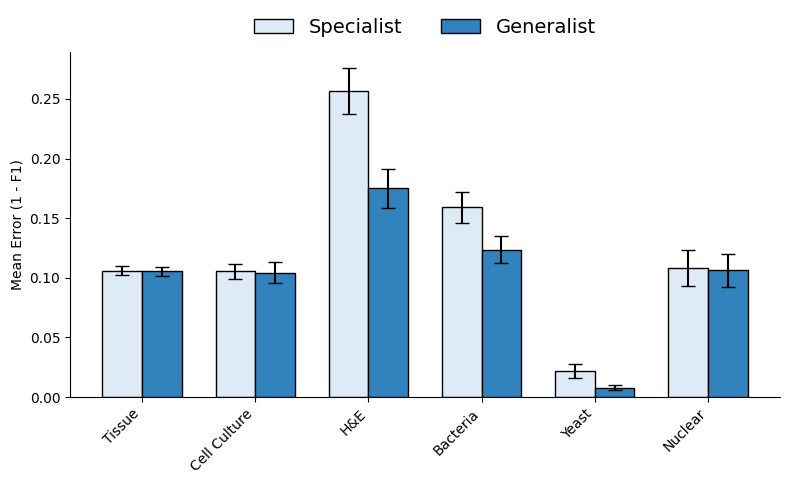

In [38]:
"""
CellSAM Specialist vs Generalist by Data Type
"""

dataset_agg_map = {
    "Tissue": ["tissuenet_wholecell"],
    "Cell Culture": ["cellpose", "ep_phase_microscopy_all", "Gendarme_BriFi"],
    "H&E": ["H_and_E"],
    "Bacteria": ["deepbacs", "omnipose"],
    "Yeast": ["YeaZ", "YeastNet"],
    "Nuclear": ["dsb_fixed"],
}

group_names = list(dataset_agg_map.keys())


cs_specifc_group_means = []
cs_general_group_means = []
cs_specifc_group_sems = []
cs_general_group_sems = []


for group in group_names:
    # Get all datasets that belong to this group
    datasets_for_group = dataset_agg_map[group]
    
    # Gather all F1 arrays and concatenate them
    cs_specific_all = np.concatenate([cellsam_specific_dict[ds] for ds in datasets_for_group])
    cs_general_all = np.concatenate([cellsam_generalist_dict[ds] for ds in datasets_for_group])

    # Compute (1 - mean(F1)) for the group
    cs_specific_mean = 1 - np.mean(cs_specific_all)
    cs_general_mean = 1 - np.mean(cs_general_all)
    cs_specifc_group_means.append(cs_specific_mean)
    cs_general_group_means.append(cs_general_mean)

    # Standard error of the mean (SEM) for the group
    cs_specific_sem = np.std(cs_specific_all, ddof=1) / np.sqrt(len(cs_specific_all))
    cs_general_sem = np.std(cs_general_all, ddof=1) / np.sqrt(len(cs_general_all))
    cs_specifc_group_sems.append(cs_specific_sem)
    cs_general_group_sems.append(cs_general_sem)

x = np.arange(len(group_names))
width = 0.35
plt.rcParams['svg.fonttype'] = 'none' 
fig, ax = plt.subplots(figsize=(8, 5))

bars_cs_specific = ax.bar(
    x - width/2, cs_specifc_group_means, width,
    edgecolor='black', linewidth=1,
    yerr=cs_specifc_group_sems, capsize=5, 
    label='Specialist', color=c3
)

bars_cs_general = ax.bar(
    x + width/2, cs_general_group_means, width,
    edgecolor='black', linewidth=1,
    yerr=cs_general_group_sems, capsize=5, 
    label='Generalist', color=c4
)

ax.set_xticks(x)
ax.set_xticklabels(group_names, rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_grouped_comparison_specific_general.svg", format="svg", dpi=300)
plt.show()


### Cellpose Generalist vs Specialist

In [23]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

name_map = {
    "Gendarme_BriFi": "BriFiSeg",
    "cellpose": "Cellpose",
    "ep_phase_microscopy_all": "Phase400",
    "H_and_E": "H&E",
    "tissuenet_wholecell": "TissueNet",
    "YeaZ": "YeaZ",
    "YeastNet": "YeastNet",
    "dsb_fixed": "DSB",
    "deepbacs": "DeepBacs",
    "omnipose": "OmniPose",
}


datasets = [
    'Gendarme_BriFi',
    'H_and_E',
    'YeaZ',
    'YeastNet',
    'cellpose',
    'deepbacs',
    'dsb_fixed',
    'ep_phase_microscopy_all',
    'omnipose',
    'tissuenet_wholecell',
]

c1 = "#fdbb84"
c2 = "#e34a33"
c3 = '#deebf7'
c4 = '#3182bd'


cellpose_path = Path('/home/ulisrael/cellSAM/paper_figures/eval_results/cellpose')
cellpose_generalist_path = cellpose_path / 'general'
cellpose_individual_path = cellpose_path / 'individual'


cellpose_generalist_dict = {}
for file in cellpose_generalist_path.glob("*.txt"):
    try:
        data = np.loadtxt(file)
        cellpose_generalist_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")


cellpose_specific_dict = {}
for file in cellpose_individual_path.glob("*.txt"):
    try:
        data = np.loadtxt(file)
        cellpose_specific_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

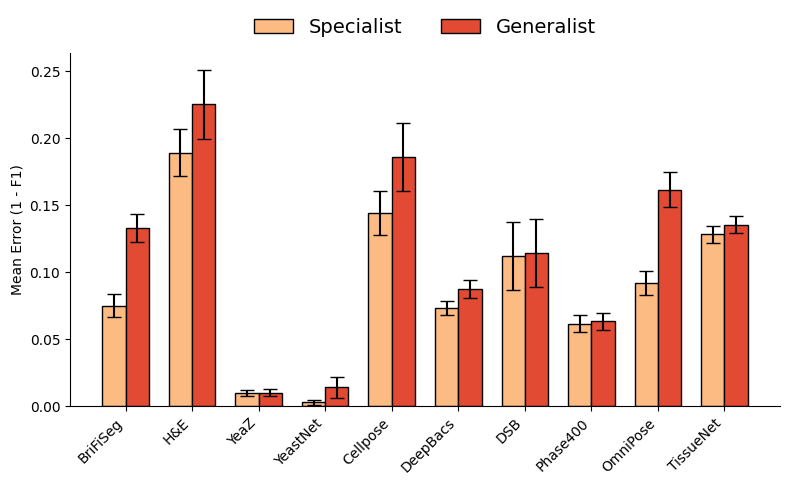

In [36]:
"""
Cellpose Specialist vs Generalist by Dataset
"""

cp_general_means = []; cp_specific_means = []
cp_general_sems = []; cp_specific_sems = []

for ds in datasets:
    cp_general_data = cellpose_generalist_dict[ds]
    cp_specific_data = cellpose_specific_dict[ds]
    
    # Compute (1 - mean(F1)) for the group
    cp_general_mean = 1 - np.mean(cp_general_data)
    cp_specific_mean = 1 - np.mean(cp_specific_data)
    cp_general_means.append(cp_general_mean)
    cp_specific_means.append(cp_specific_mean)
    
    # Standard error of the mean (SEM) for the group
    cp_general_sem = np.std(cp_general_data, ddof=1) / np.sqrt(len(cp_general_data))
    cp_specific_sem = np.std(cp_specific_data, ddof=1) / np.sqrt(len(cp_specific_data))
    cp_general_sems.append(cp_general_sem)
    cp_specific_sems.append(cp_specific_sem)


x = np.arange(len(datasets))
width = 0.35
plt.rcParams['svg.fonttype'] = 'none' 
fig, ax = plt.subplots(figsize=(8, 5))

bars_cp_specific = ax.bar(
    x - width/2, cp_specific_means, width,
    edgecolor='black', linewidth=1,
    yerr=cp_specific_sems, capsize=5, 
    label='Specialist', color=c1
)

bars_cp_general = ax.bar(
    x + width/2, cp_general_means, width,
    edgecolor='black', linewidth=1,
    yerr=cp_general_sems, capsize=5, 
    label='Generalist', color=c2
)

ax.set_xticks(x)
ax.set_xticklabels([name_map[ds] for ds in datasets], rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
# ax.set_title('Generalist Model Comparison of Mean Error')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_dataset_comparison_CELLPOSE_specific_general.svg", format="svg", dpi=300)
plt.show()

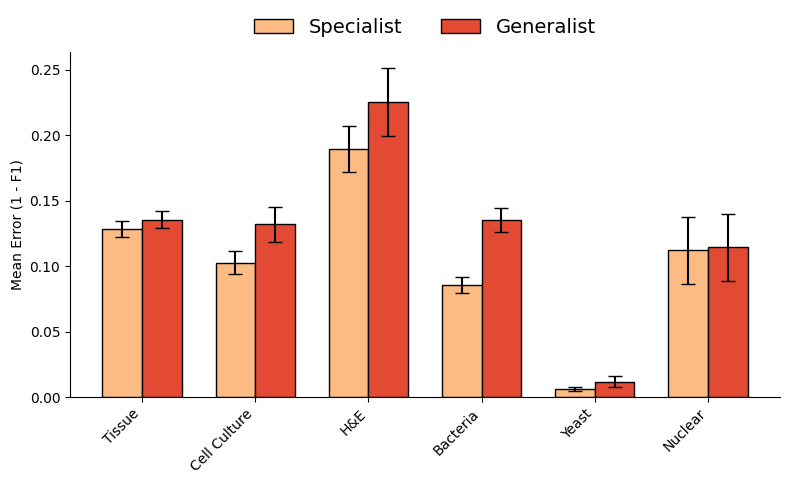

In [37]:
"""
Cellpose Specialist vs Generalist by Data Type
"""

dataset_agg_map = {
    "Tissue": ["tissuenet_wholecell"],
    "Cell Culture": ["cellpose", "ep_phase_microscopy_all", "Gendarme_BriFi"],
    "H&E": ["H_and_E"],
    "Bacteria": ["deepbacs", "omnipose"],
    "Yeast": ["YeaZ", "YeastNet"],
    "Nuclear": ["dsb_fixed"],
}

group_names = list(dataset_agg_map.keys())
cp_group_general_means = []
cp_group_general_sems  = []
cp_group_specific_means = []
cp_group_specific_sems  = []

for group in group_names:
    datasets_for_group = dataset_agg_map[group]
    cp_general_all = np.concatenate([cellpose_generalist_dict[ds] for ds in datasets_for_group])
    cp_specific_all = np.concatenate([cellpose_specific_dict[ds] for ds in datasets_for_group])
    
    cp_general_mean = 1 - np.mean(cp_general_all)
    cp_specific_mean = 1 - np.mean(cp_specific_all)
    cp_group_general_means.append(cp_general_mean)
    cp_group_specific_means.append(cp_specific_mean)
    
    cp_general_sem = np.std(cp_general_all, ddof=1) / np.sqrt(len(cp_general_all))
    cp_specific_sem = np.std(cp_specific_all, ddof=1) / np.sqrt(len(cp_specific_all))
    cp_group_general_sems.append(cp_general_sem)
    cp_group_specific_sems.append(cp_specific_sem)



x = np.arange(len(group_names))
width = 0.35
plt.rcParams['svg.fonttype'] = 'none' 
fig, ax = plt.subplots(figsize=(8, 5))


bars_cp_specific = ax.bar(
    x - width/2, cp_group_specific_means, width,
    yerr=cp_group_specific_sems, edgecolor='black', linewidth=1, capsize=5, 
    label='Specialist', color=c1
)

bars_cp_general = ax.bar(
    x + width/2, cp_group_general_means, width,
    yerr=cp_group_general_sems, edgecolor='black', linewidth=1, capsize=5, 
    label='Generalist', color=c2
)


ax.set_xticks(x)
ax.set_xticklabels(group_names, rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_grouped_comparison_CELLPOSE_specific_general.svg", format="svg", dpi=300)
plt.show()

### CellSAM vs Cellpose - Cyto3 Comparision

In [26]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

name_map = {
    "Gendarme_BriFi": "BriFiSeg",
    "cellpose": "Cellpose",
    "ep_phase_microscopy_all": "Phase400",
    "H_and_E": "H&E",
    "tissuenet_wholecell": "TissueNet",
    "YeaZ": "YeaZ",
    "YeastNet": "YeastNet",
    "dsb_fixed": "DSB",
    "deepbacs": "DeepBacs",
    "omnipose": "OmniPose",
}


datasets = [
    'Gendarme_BriFi',
    'H_and_E',
    'YeaZ',
    'YeastNet',
    'cellpose',
    'deepbacs',
    'dsb_fixed',
    'ep_phase_microscopy_all',
    'omnipose',
    'tissuenet_wholecell',
]

c1 = "#fdbb84"
c2 = "#e34a33"
c3 = '#deebf7'
c4 = '#3182bd'

In [27]:
cellsam_path = Path('/home/ulisrael/cellSAM/paper_figures/eval_results/cellsam')
cellpose_path = Path('/home/ulisrael/cellSAM/paper_figures/eval_results/cellpose')

cellpose_generalist_path = cellpose_path / 'cyto3'
cellsam_generalist_path = cellsam_path / 'general'


cp_generalist_dict = {}

for file in cellpose_generalist_path.glob("*.txt"):
    try:
        data = np.loadtxt(file)
        cp_generalist_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

cs_generalist_dict = {}

for file in cellsam_generalist_path.glob("*.txt"):
    try:
        data = np.loadtxt(file)
        cs_generalist_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")


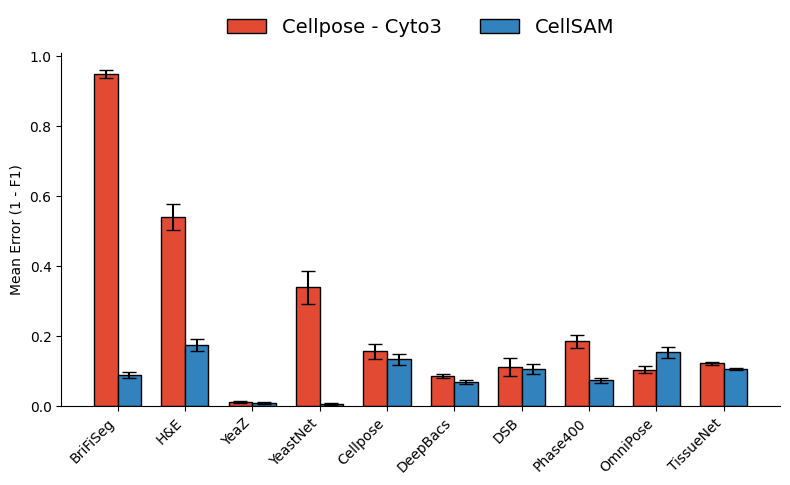

In [33]:
"""
CellSAM vs Cellpose - Cyto3 Comparision by Dataset
"""

cp_means = []; cs_means = []
cp_sems = []; cs_sems = []

for ds in datasets:
    cp_data = cp_generalist_dict[ds]
    cs_data = cs_generalist_dict[ds]
    # 1 - mean for the bar
    cp_m = 1 - np.mean(cp_data)
    cs_m = 1 - np.mean(cs_data)
    # standard error of the mean for the error bar
    cp_sem = np.std(cp_data, ddof=1) / np.sqrt(len(cp_data))
    cs_sem = np.std(cs_data, ddof=1) / np.sqrt(len(cs_data))

    cp_means.append(cp_m)
    cs_means.append(cs_m)
    cp_sems.append(cp_sem)
    cs_sems.append(cs_sem)

# Plot as a bar chart
x = np.arange(len(datasets))
width = 0.35  # width of each bar
plt.rcParams['svg.fonttype'] = 'none' 
fig, ax = plt.subplots(figsize=(8, 5))

# Plot CP bars slightly left, CS bars slightly right
bars_cp = ax.bar(x - width/2, cp_means, width, 
                 edgecolor='black', linewidth=1,
                 yerr=cp_sems, capsize=5, label='Cellpose - Cyto3', color=c2)
bars_cs = ax.bar(x + width/2, cs_means, width, 
                 edgecolor='black', linewidth=1,
                 yerr=cs_sems, capsize=5, label='CellSAM', color=c4)

ax.set_xticks(x)
ax.set_xticklabels([name_map[ds] for ds in datasets], rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
# ax.set_title('Generalist Model Comparison of Mean Error')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_dataset_comparison_cyto3.svg", format="svg", dpi=300)
plt.show()

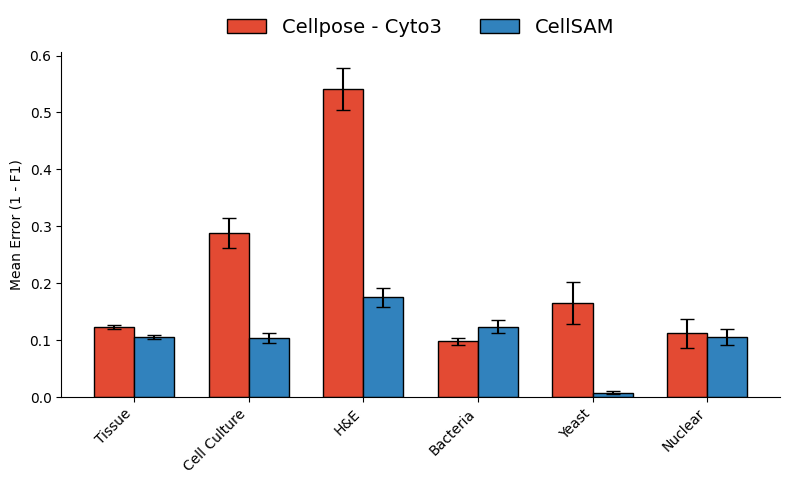

In [32]:
"""
CellSAM vs Cellpose - Cyto3 Comparision by Data Type
"""

dataset_agg_map = {
    "Tissue": ["tissuenet_wholecell"],
    "Cell Culture": ["cellpose", "ep_phase_microscopy_all", "Gendarme_BriFi"],
    "H&E": ["H_and_E"],
    "Bacteria": ["deepbacs", "omnipose"],
    "Yeast": ["YeaZ", "YeastNet"],
    "Nuclear": ["dsb_fixed"],
}

group_names = list(dataset_agg_map.keys())
cp_group_means = []
cp_group_sems  = []
cs_group_means = []
cs_group_sems  = []

for group in group_names:
    # Get all datasets that belong to this group
    datasets_for_group = dataset_agg_map[group]
    
    # Gather all F1 arrays and concatenate them
    cp_all = np.concatenate([cp_generalist_dict[ds] for ds in datasets_for_group])
    cs_all = np.concatenate([cs_generalist_dict[ds] for ds in datasets_for_group])
    
    # Compute (1 - mean(F1)) for the group
    cp_mean = 1 - np.mean(cp_all)
    cs_mean = 1 - np.mean(cs_all)
    cp_group_means.append(cp_mean)
    cs_group_means.append(cs_mean)
    
    # Standard error of the mean (SEM) for the group
    cp_sem = np.std(cp_all, ddof=1) / np.sqrt(len(cp_all))
    cs_sem = np.std(cs_all, ddof=1) / np.sqrt(len(cs_all))
    cp_group_sems.append(cp_sem)
    cs_group_sems.append(cs_sem)

# Now plot side‐by‐side bars for the groups
x = np.arange(len(group_names))
width = 0.35
plt.rcParams['svg.fonttype'] = 'none' 
fig, ax = plt.subplots(figsize=(8,5))

bars_cp = ax.bar(
    x - width/2, cp_group_means, width,
    yerr=cp_group_sems, edgecolor='black', linewidth=1, capsize=5, 
    label='Cellpose - Cyto3', color=c2
)
bars_cs = ax.bar(
    x + width/2, cs_group_means, width,
    yerr=cs_group_sems, edgecolor='black', linewidth=1, capsize=5, 
    label='CellSAM', color=c4
)

ax.set_xticks(x)
ax.set_xticklabels(group_names, rotation=45, ha='right')
ax.set_ylabel('Mean Error (1 - F1)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={'size': 14},
    frameon=False
)
plt.tight_layout()
# fig.savefig("mean_error_grouped_comparison_cyto3.svg", format="svg", dpi=300)
plt.show()

### LiveCell

In [5]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

cellsam_path = Path('/home/ulisrael/AllCell/livecell/cellsam')
cellpose_path = Path('/home/ulisrael/AllCell/livecell/cellpose')


c1 = "#fdbb84"
c2 = "#e34a33"
c3 = '#deebf7'
c4 = '#3182bd'


cellpose_generalist_path = cellpose_path / 'general/'
cellsam_generalist_path = cellsam_path / 'general/'
cellsam_fewshot_path = cellsam_path / 'general_FS_10_FT/'


cp_generalist_dict = {}
for file in cellpose_generalist_path.glob("LIVECell_good.txt"):
    try:
        data = np.loadtxt(file)
        cp_generalist_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

cs_generalist_dict = {}
for file in cellsam_generalist_path.glob("LIVECell_good.txt"):
    try:
        data = np.loadtxt(file)
        cs_generalist_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")


cs_fewshot_dict = {}
for file in cellsam_fewshot_path.glob("LIVECell_good.txt"):
    try:
        data = np.loadtxt(file)
        cs_fewshot_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

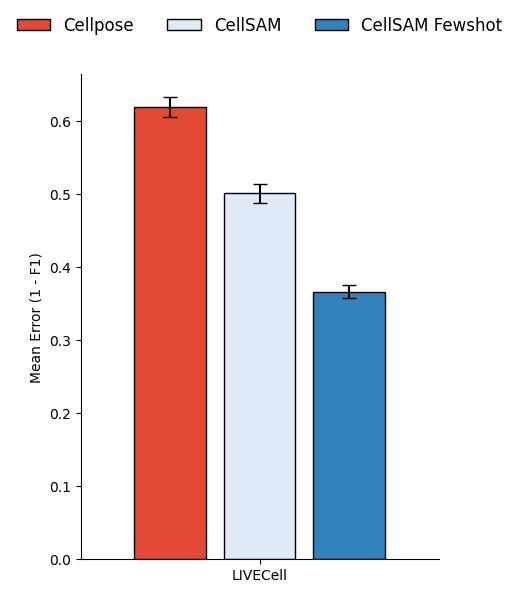

In [6]:
import matplotlib.pyplot as plt
import numpy as np

dataset = 'LIVECell_good'  # Single dataset name

# Extract data from dictionaries (replace with your actual data extraction logic)
cp_data = cp_generalist_dict.get(dataset, [])
cs_data = cs_generalist_dict.get(dataset, [])
cs_fewshot_data = cs_fewshot_dict.get(dataset, [])

# Compute mean and standard error
cp_mean = 1 - np.mean(cp_data)
cs_mean = 1 - np.mean(cs_data)
cs_fewshot_mean = 1 - np.mean(cs_fewshot_data)

cp_sem = np.std(cp_data, ddof=1) / np.sqrt(len(cp_data)) 
cs_sem = np.std(cs_data, ddof=1) / np.sqrt(len(cs_data))    
cs_fewshot_sem = np.std(cs_fewshot_data, ddof=1) / np.sqrt(len(cs_fewshot_data)) 

# Set up bar positions
x = np.array([0])  # Single data point
bar_spacing = 0.05  # Space between bars
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(5, 6))  # Adjust figure size

# Adjust positions of each bar for even spacing
bars_cp = ax.bar(x - width - bar_spacing, cp_mean, width, yerr=cp_sem, capsize=5, 
                 label='Cellpose', color=c2, edgecolor='black')

bars_cs = ax.bar(x, cs_mean, width, yerr=cs_sem, capsize=5, 
                 label='CellSAM', color=c3, edgecolor='black')  # Adjusted color for distinction

bars_csf = ax.bar(x + width + bar_spacing, cs_fewshot_mean, width, yerr=cs_fewshot_sem, capsize=5, 
                  label='CellSAM Fewshot', color=c4, edgecolor='black')

# Labels and styling
ax.set_xticks(x)
ax.set_xticklabels(["LIVECell"], ha='center')
ax.set_ylabel("Mean Error (1 - F1)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# Adjust legend to accommodate three categories
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, prop={'size': 12}, frameon=False)
ax.set_xlim([-0.5, 0.5])  
plt.tight_layout()
# fig.savefig("mean_error_livecell_dataset.svg", format="svg", dpi=300)
plt.show()

576 576 576 576


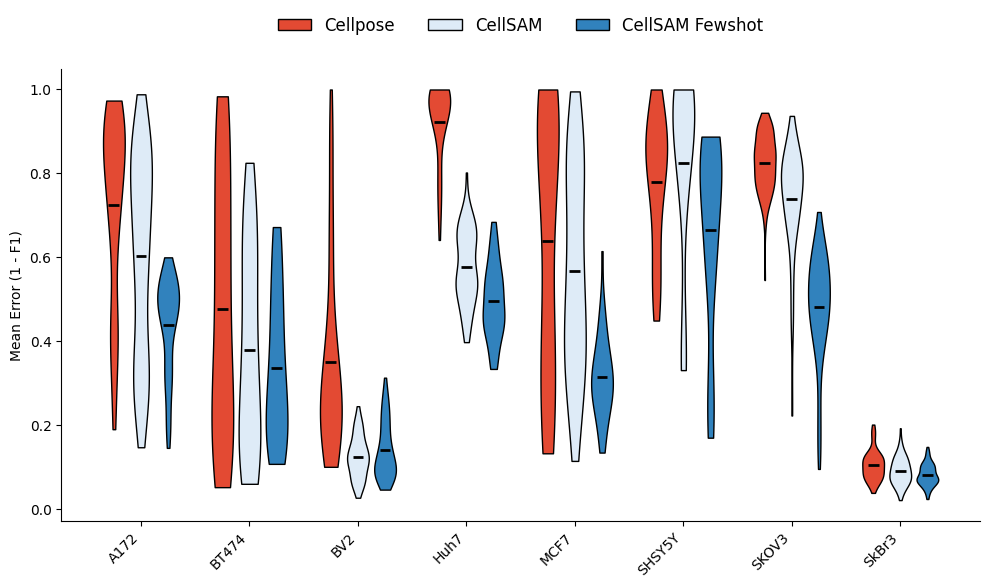

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path


cellsam_path = Path('/home/ulisrael/AllCell/livecell/cellsam')
cellpose_path = Path('/home/ulisrael/AllCell/livecell/cellpose')

cellpose_generalist_path = cellpose_path / 'general/'
cellsam_generalist_path = cellsam_path / 'general/'
cellsam_fewshot_path = cellsam_path / 'general_FS_10_FT/'

cp_generalist_dict = {}
for file in cellpose_generalist_path.glob("LIVECell_good.txt"):
    try:
        data = np.loadtxt(file)
        cp_generalist_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

cs_generalist_dict = {}
for file in cellsam_generalist_path.glob("LIVECell_good.txt"):
    try:
        data = np.loadtxt(file)
        cs_generalist_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

cs_fewshot_dict = {}
for file in cellsam_fewshot_path.glob("LIVECell_good.txt"):
    try:
        data = np.loadtxt(file)
        cs_fewshot_dict[file.stem] = data
    except Exception as e:
        print(f"Error reading {file.name}: {e}")
        
dataset = ['LIVECell_good']

# Load cell types
celltypes = pd.read_csv(
    '/home/ulisrael/cellSAM/paper_figures/metadata_LIVECELL.csv', 
    header=None
)
celltypes_array = celltypes.values.flatten()

# Load errors (already doing 1 - value)
cp_data        = 1 - cp_generalist_dict.get("LIVECell_good", [])
cs_data        = 1 - cs_generalist_dict.get("LIVECell_good", [])
cs_fewshotData = 1 - cs_fewshot_dict.get("LIVECell_good", [])

print(len(celltypes), len(cp_data), len(cs_data), len(cs_fewshotData))

# Build DataFrame
df_cp = pd.DataFrame({
    'error':    cp_data,
    'method':   'CellPose',
    'celltype': celltypes_array
})
df_cs = pd.DataFrame({
    'error':    cs_data,
    'method':   'CellSam',
    'celltype': celltypes_array
})
df_csf = pd.DataFrame({
    'error':    cs_fewshotData,
    'method':   'CellSam Fewshot',
    'celltype': celltypes_array
})
df_all = pd.concat([df_cp, df_cs, df_csf], ignore_index=True)


fig, ax = plt.subplots(figsize=(10, 6))

# Get unique cell types in the order they appear
unique_celltypes = df_all['celltype'].unique()
x_positions = np.arange(len(unique_celltypes))  
offset  = 0.25
v_width = 0.2  

for i, ct in enumerate(unique_celltypes):
    cp_vals  = df_all.query("celltype == @ct & method == 'CellPose'")['error']
    cs_vals  = df_all.query("celltype == @ct & method == 'CellSam'")['error']
    csf_vals = df_all.query("celltype == @ct & method == 'CellSam Fewshot'")['error']
    
    vio_cp = ax.violinplot(
        [cp_vals],                
        positions=[x_positions[i] - offset],
        widths=v_width,
        showmeans=True,
        showextrema=False,
        showmedians=False
    )
    for b in vio_cp['bodies']:
        b.set_facecolor(c2)       
        b.set_edgecolor('black')
        b.set_alpha(1.0)          
    if 'cmeans' in vio_cp:
        vio_cp['cmeans'].set_color('black')
        vio_cp['cmeans'].set_linewidth(2.0)

    vio_cs = ax.violinplot(
        [cs_vals],
        positions=[x_positions[i]],
        widths=v_width,
        showmeans=True,
        showextrema=False,
        showmedians=False
    )
    for b in vio_cs['bodies']:
        b.set_facecolor(c3)       
        b.set_edgecolor('black')
        b.set_alpha(1.0)
    if 'cmeans' in vio_cs:
        vio_cs['cmeans'].set_color('black')
        vio_cs['cmeans'].set_linewidth(2.0)

    vio_csf = ax.violinplot(
        [csf_vals],
        positions=[x_positions[i] + offset],
        widths=v_width,
        showmeans=True,
        showextrema=False,
        showmedians=False
    )
    for b in vio_csf['bodies']:
        b.set_facecolor(c4)       
        b.set_edgecolor('black')
        b.set_alpha(1.0)
    if 'cmeans' in vio_csf:
        vio_csf['cmeans'].set_color('black')
        vio_csf['cmeans'].set_linewidth(2.0)

# Set x‐labels, y‐labels, title
ax.set_xticks(x_positions)
ax.set_xticklabels(unique_celltypes, rotation=45, ha='right')
ax.set_ylabel("Mean Error (1 - F1)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Build a custom legend that matches the violin colors exactly
legend_patches = [
    mpatches.Patch(facecolor=c2, edgecolor='black', label='Cellpose'),
    mpatches.Patch(facecolor=c3, edgecolor='black', label='CellSAM'),
    mpatches.Patch(facecolor=c4, edgecolor='black', label='CellSAM Fewshot')
]
ax.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, prop={'size': 12}, frameon=False)
plt.tight_layout()
# fig.savefig("mean_error_dataset_livecell_dataset.svg", format="svg", dpi=300)
plt.show()

### Neurips

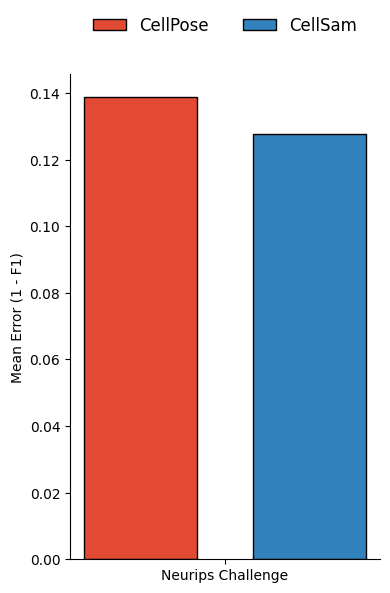

In [9]:
cp_mean = 1- 0.8612
cs_mean = 1- 0.8723

x = np.array([0])  # Single data point
bar_spacing = 0.05 
width = 0.2  # Width of bars

fig, ax = plt.subplots(figsize=(4, 6))

# Bar plots with error bars
bars_cp = ax.bar(x - (width/2 + bar_spacing), cp_mean, width,  label='CellPose', color=c2, edgecolor='black')
bars_cs = ax.bar(x + (width/2 + bar_spacing), cs_mean, width,  label='CellSam', color=c4, edgecolor='black')

# Labels and styling
ax.set_xticks(x)
ax.set_xticklabels(["Neurips Challenge"], ha='center')
ax.set_ylabel("Mean Error (1 - F1)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, prop={'size': 12}, frameon=False)

plt.tight_layout()
# fig.savefig("mean_error_neurips_dataset.svg", format="svg", dpi=300)
plt.show()